In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./results/mdi_local.two_subgroups_linear_sims/varying_heritability_n/seed331/results.csv")

In [3]:
df

,rep,n,n_name,heritability,heritability_name,n_estimators,min_samples_leaf,max_features,include_raw,model,...,time,split_seed,index,var,local_fi_score_group1_mean,local_fi_score_group2_mean,true_support_group1,true_support_group2,cor_with_signal_group1,cor_with_signal_group2
0,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,...,1.002966,331,0,0,0.206750,0.172639,1.0,0.0,NaN,0.420732
1,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,...,1.002966,331,0,1,0.090429,0.086598,1.0,0.0,NaN,0.304871
2,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,...,1.002966,331,0,2,0.199262,0.208132,1.0,0.0,NaN,0.216724
3,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,...,1.002966,331,0,3,0.197402,0.199236,1.0,0.0,NaN,0.290071
4,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,...,1.002966,331,0,4,0.199082,0.172732,1.0,0.0,NaN,0.280937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0,250,250,0.8,0.8,100,5,0.33,NaN,RF,...,0.062930,331,55,15,0.044821,0.040535,0.0,0.0,0.155685,0.268738
1116,0,250,250,0.8,0.8,100,5,0.33,NaN,RF,...,0.062930,331,55,16,0.067521,0.068946,0.0,0.0,0.140356,0.239931
1117,0,250,250,0.8,0.8,100,5,0.33,NaN,RF,...,0.062930,331,55,17,0.031188,0.033423,0.0,0.0,0.200830,0.198310
1118,0,250,250,0.8,0.8,100,5,0.33,NaN,RF,...,0.062930,331,55,18,0.037495,0.038311,0.0,0.0,0.133532,0.282982


In [4]:
methods = ["MDI_all_stumps", "MDI_sub_stumps", "MDI_all_stumps_without_raw", "MDI_sub_stumps_without_raw", "LFI_sum_absolute_all_stumps",
           "LFI_absolute_sum_all_stumps", "LFI_sum_absolute_sub_stumps", "LFI_absolute_sum_sub_stumps", 
           "LFI_sum_absolute_all_stumps_without_raw", "LFI_absolute_sum_all_stumps_without_raw",
           "LFI_sum_absolute_sub_stumps_without_raw", "LFI_absolute_sum_sub_stumps_without_raw", "TreeSHAP", "LIME"]
sample_row_n = df["n"].unique().tolist()
sample_row_n.sort()
heritability = df["heritability"].unique().tolist()
heritability.sort()
nreps = df["rep"].max()
results = {}
for r in range(nreps+1):
    results[r] = {}
    for h in heritability:
        results[r][h] = {}
        for m in methods:
            results[r][h][m] = {}
            results[r][h][m]["auroc_group1_avg_metric"] = []
            results[r][h][m]["auroc_group2_avg_metric"] = []
            results[r][h][m]["auroc_group1_avg_prediction"] = []
            results[r][h][m]["auroc_group2_avg_prediction"] = []

In [5]:
for r in range(nreps+1):
    for h in heritability:
        for m in methods:
            for s in sample_row_n:
                df_sub = df[(df["fi"] == m) & (df["n"] == s) & (df["heritability"] == h) & (df["rep"] == r)]
                assert len(df_sub["rocauc_group1_avg_metric"].unique()) == 1
                assert len(df_sub["rocauc_group2_avg_metric"].unique()) == 1
                assert len(df_sub["rocauc_group1_avg_prediction"].unique()) == 1
                assert len(df_sub["rocauc_group2_avg_prediction"].unique()) == 1
                results[r][h][m]["auroc_group1_avg_metric"].append(df_sub["rocauc_group1_avg_metric"].unique()[0])
                results[r][h][m]["auroc_group2_avg_metric"].append(df_sub["rocauc_group2_avg_metric"].unique()[0])
                results[r][h][m]["auroc_group1_avg_prediction"].append(df_sub["rocauc_group1_avg_prediction"].unique()[0])
                results[r][h][m]["auroc_group2_avg_prediction"].append(df_sub["rocauc_group2_avg_prediction"].unique()[0])

In [6]:
agg_results = {} 
for h in heritability:
    agg_results[h] = {}
    for m in methods:
        agg_results[h][m] = {}
        agg_results[h][m]["auroc_group1_avg_metric"] = []
        agg_results[h][m]["auroc_group2_avg_metric"] = []
        agg_results[h][m]["auroc_group1_avg_prediction"] = []
        agg_results[h][m]["auroc_group2_avg_prediction"] = []

In [7]:
for h in heritability:
    for m in methods:
        for s in sample_row_n:
            agg_group1_avg_metric = 0
            agg_group2_avg_metric = 0
            agg_group1_avg_prediction = 0
            agg_group2_avg_prediction = 0
            for r in range(nreps+1):
                df_sub = df[(df["fi"] == m) & (df["n"] == s) & (df["heritability"] == h) & (df["rep"] == r)]
                assert len(df_sub["rocauc_group1_avg_metric"].unique()) == 1
                assert len(df_sub["rocauc_group2_avg_metric"].unique()) == 1
                assert len(df_sub["rocauc_group1_avg_prediction"].unique()) == 1
                assert len(df_sub["rocauc_group2_avg_prediction"].unique()) == 1
                agg_group1_avg_metric += df_sub["rocauc_group1_avg_metric"].unique()[0]
                agg_group2_avg_metric += df_sub["rocauc_group2_avg_metric"].unique()[0]
                agg_group1_avg_prediction += df_sub["rocauc_group1_avg_prediction"].unique()[0]
                agg_group2_avg_prediction += df_sub["rocauc_group2_avg_prediction"].unique()[0]
            agg_group1_avg_metric /= (nreps+1)
            agg_group2_avg_metric /= (nreps+1)
            agg_group1_avg_prediction /= (nreps+1)
            agg_group2_avg_prediction /= (nreps+1)
            agg_results[h][m]["auroc_group1_avg_metric"].append(agg_group1_avg_metric)
            agg_results[h][m]["auroc_group2_avg_metric"].append(agg_group2_avg_metric)
            agg_results[h][m]["auroc_group1_avg_prediction"].append(agg_group1_avg_prediction)
            agg_results[h][m]["auroc_group2_avg_prediction"].append(agg_group2_avg_prediction)

In [8]:
agg_results

{0.1: {'MDI_all_stumps': {'auroc_group1_avg_metric': [0.5279999999999999,
    0.5349333333333331],
   'auroc_group2_avg_metric': [0.5141333333333334, 0.5372799999999999],
   'auroc_group1_avg_prediction': [0.4133333333333334, 0.96],
   'auroc_group2_avg_prediction': [0.72, 0.76]},
  'MDI_sub_stumps': {'auroc_group1_avg_metric': [0.5378666666666666,
    0.5315199999999999],
   'auroc_group2_avg_metric': [0.5125333333333334, 0.5310933333333332],
   'auroc_group1_avg_prediction': [0.4133333333333334, 0.9733333333333334],
   'auroc_group2_avg_prediction': [0.72, 0.76]},
  'MDI_all_stumps_without_raw': {'auroc_group1_avg_metric': [0.5365333333333335,
    0.5198933333333333],
   'auroc_group2_avg_metric': [0.4885333333333334, 0.5106133333333334],
   'auroc_group1_avg_prediction': [0.28, 0.9466666666666668],
   'auroc_group2_avg_prediction': [0.56, 0.7333333333333334]},
  'MDI_sub_stumps_without_raw': {'auroc_group1_avg_metric': [0.5245333333333334,
    0.5261866666666668],
   'auroc_group2_a

In [9]:
agg_results[heritability[0]][methods[0]]["auroc_group1_avg_metric"]

[0.5279999999999999, 0.5349333333333331]

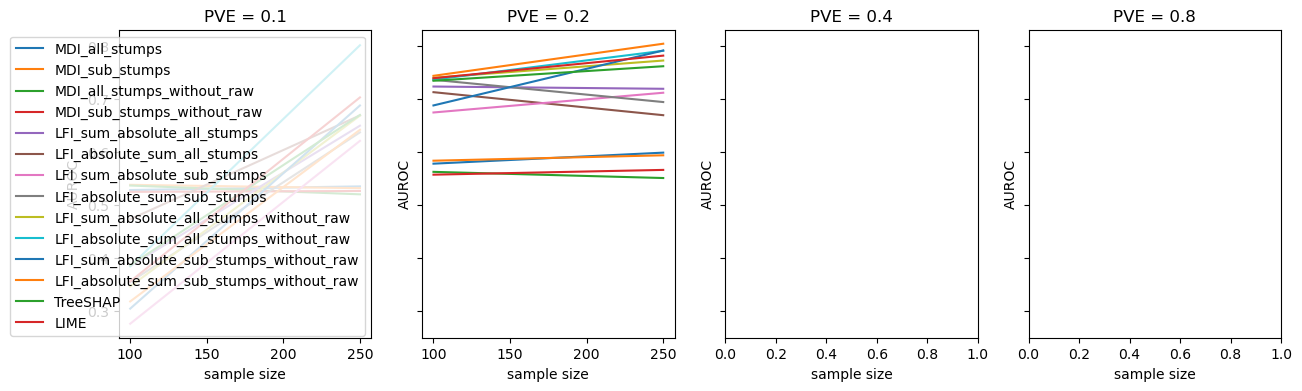

In [10]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 4), sharey=True)


for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group1_avg_metric"], label=m)
    
    
# Set labels and title
axs[0].set_xlabel('sample size')
axs[0].set_ylabel('AUROC')
axs[0].set_title('PVE = 0.1')

axs[1].set_xlabel('sample size')
axs[1].set_ylabel('AUROC')
axs[1].set_title('PVE = 0.2')

axs[2].set_xlabel('sample size')
axs[2].set_ylabel('AUROC')
axs[2].set_title('PVE = 0.4')

axs[3].set_xlabel('sample size')
axs[3].set_ylabel('AUROC')
axs[3].set_title('PVE = 0.8')

# Share the label in the last plot
axs[0].legend()

# Show the plots
plt.show()

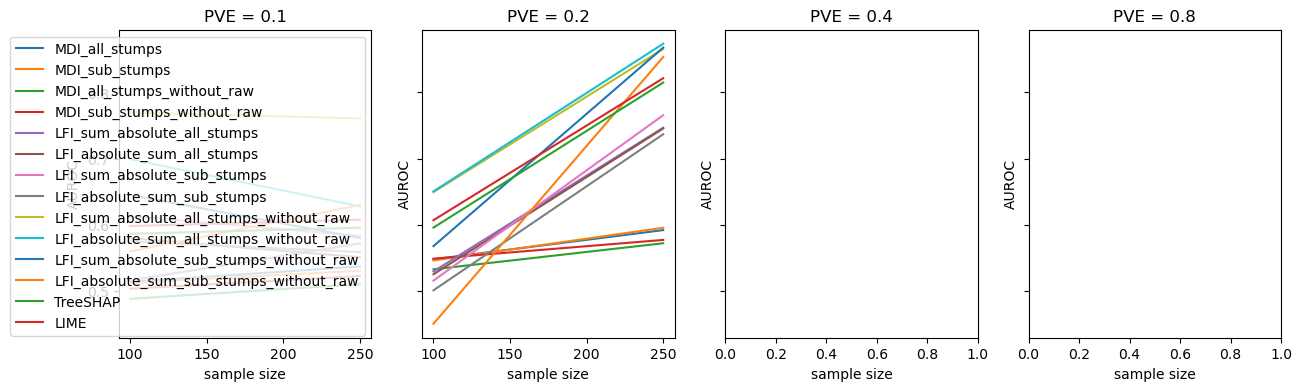

In [11]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 4), sharey=True)


for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group2_avg_metric"], label=m)
    
    
# Set labels and title
axs[0].set_xlabel('sample size')
axs[0].set_ylabel('AUROC')
axs[0].set_title('PVE = 0.1')

axs[1].set_xlabel('sample size')
axs[1].set_ylabel('AUROC')
axs[1].set_title('PVE = 0.2')

axs[2].set_xlabel('sample size')
axs[2].set_ylabel('AUROC')
axs[2].set_title('PVE = 0.4')

axs[3].set_xlabel('sample size')
axs[3].set_ylabel('AUROC')
axs[3].set_title('PVE = 0.8')

# Share the label in the last plot
axs[0].legend()

# Show the plots
plt.show()

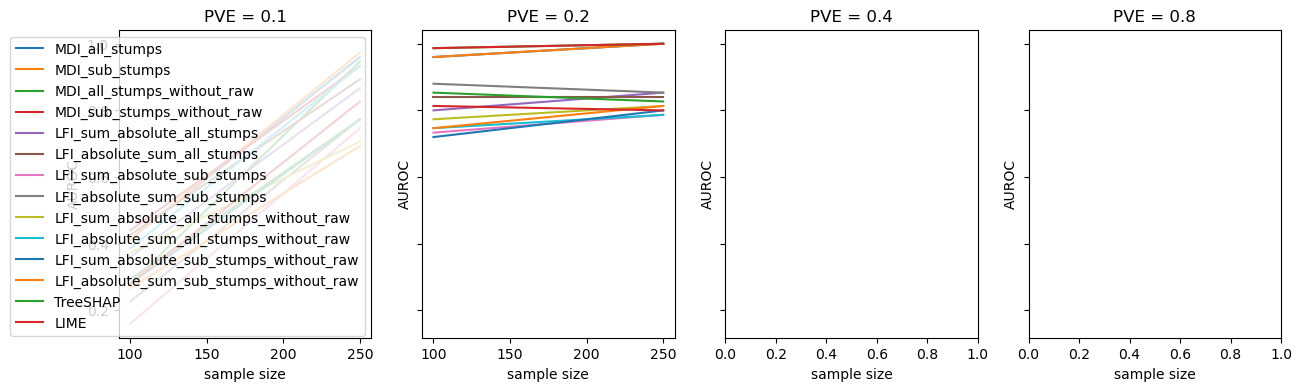

In [12]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 4), sharey=True)


for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group1_avg_prediction"], label=m)
    
    
# Set labels and title
axs[0].set_xlabel('sample size')
axs[0].set_ylabel('AUROC')
axs[0].set_title('PVE = 0.1')

axs[1].set_xlabel('sample size')
axs[1].set_ylabel('AUROC')
axs[1].set_title('PVE = 0.2')

axs[2].set_xlabel('sample size')
axs[2].set_ylabel('AUROC')
axs[2].set_title('PVE = 0.4')

axs[3].set_xlabel('sample size')
axs[3].set_ylabel('AUROC')
axs[3].set_title('PVE = 0.8')

# Share the label in the last plot
axs[0].legend()

# Show the plots
plt.show()

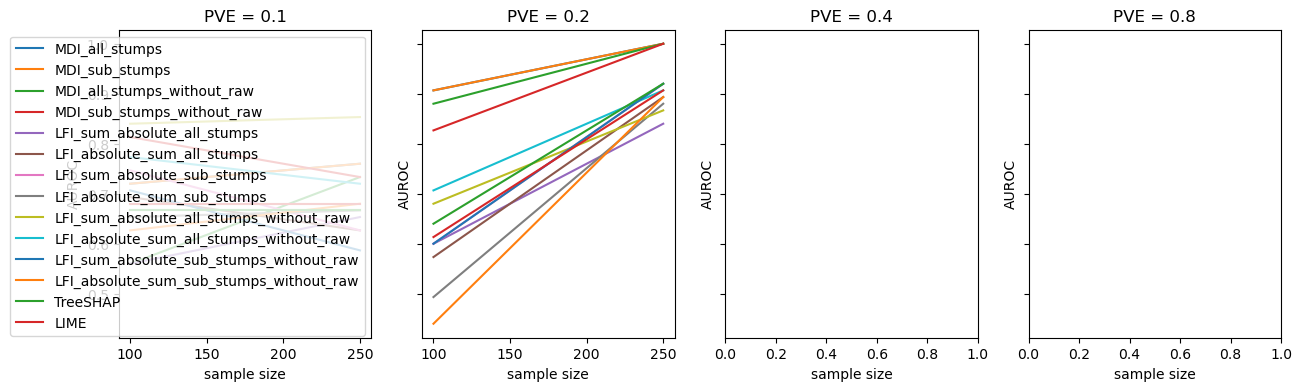

In [13]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 4), sharey=True)


for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group2_avg_prediction"], label=m)
    
    
# Set labels and title
axs[0].set_xlabel('sample size')
axs[0].set_ylabel('AUROC')
axs[0].set_title('PVE = 0.1')

axs[1].set_xlabel('sample size')
axs[1].set_ylabel('AUROC')
axs[1].set_title('PVE = 0.2')

axs[2].set_xlabel('sample size')
axs[2].set_ylabel('AUROC')
axs[2].set_title('PVE = 0.4')

axs[3].set_xlabel('sample size')
axs[3].set_ylabel('AUROC')
axs[3].set_title('PVE = 0.8')

# Share the label in the last plot
axs[0].legend()

# Show the plots
plt.show()